# Discrete Distributions

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
sns.set_style('whitegrid')

# Uniform Distributions

In [2]:
n = 6
pmf = [1/n] * n
pmf_x = range(1, n+1)
cdf_x = range(0, n+2)
cdf = [min(1, 1/n * max(0, (xx - 1))) for xx in cdf_x]

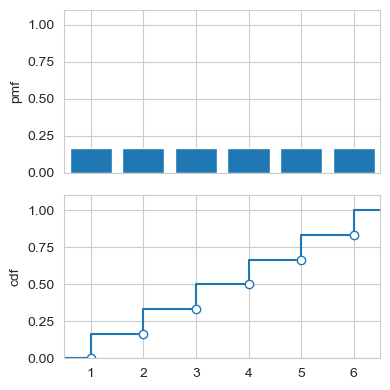

In [4]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(4,4), sharex=True, sharey=True)
ax1.bar(x=pmf_x, height=pmf)
ax1.set_ylim(0,1.1)
ax1.set_ylabel('pmf')
ax2.step(x=cdf_x, y=cdf, where='pre', marker='o', markerfacecolor='white')
ax2.set_xlim(0.5, n+0.5)
ax2.set_ylabel('cdf')

fig.tight_layout()

In [5]:
def plot_pmfcdf(x, y, figsize=(4,4)):
    '''
    This function creates a figure containing two axes that plot the probability 
    mass function and cumulative distribution function of a discrete distribution.
    
    Inputs:
    x : The numerical values that the random variable may take with probability > 0
        This should be presented as a list or array.
    y : The probability values (pmf) associated with x, in the same order as x
        Again, this should be presented as a list or array.
    figsize : Sets the figure size. Defaults to 4x4. 
        This should be a tuple of length 2.
        
    Returns:
    fig : A figure object with two axes to further refine, display, or save.
    '''
    fig, ax = plt.subplots(nrows=2,figsize=figsize, gridspec_kw={'height_ratios': [1, 3]})
    ax[0].bar(x=x, height=y)
    ax[0].set_xlim([min(x)-0.5, max(x)+0.5])
    ax[0].set_ylim([-0.05,max(y)+0.05])
    ax[0].set_ylabel(r'$f(x)$')
    ax[0].axhline(0, color='gray')
    
    xcdf = [x[0]-1] + x + [x[len(x)-1]+1]
    cdf = [0] + [sum(y[:ii+1]) for ii in range(len(x))] + [1]
    for ii in range(len(xcdf)-1):
        ax[1].plot([xcdf[ii],xcdf[ii]], [cdf[ii-1],cdf[ii]], ls=':',color='C0')
        ax[1].plot([xcdf[ii],xcdf[ii+1]], [cdf[ii],cdf[ii]], color='C0')
    ax[1].scatter(x=x, y=cdf[:len(x)], marker='o', color='white', edgecolor='C0')
    ax[1].scatter(x=x, y=cdf[1:-1], color='C0')
    ax[1].set_xlim(ax[0].get_xlim())
    ax[1].set_ylim([-0.05,1.05])
    ax[1].set_ylabel(r'$F(x)$')
    fig.tight_layout()
    return fig

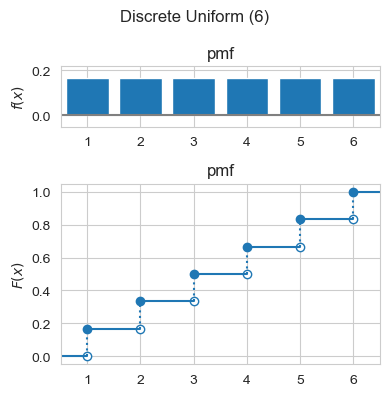

In [8]:
fig = plot_pmfcdf(x=list(pmf_x), y=pmf)
ax = fig.axes
ax[0].set_title('pmf')
ax[1].set_title('pmf')
fig.suptitle('Discrete Uniform (6)')
fig.tight_layout()


## Using SciPy.Stats

In [9]:
dist = stats.randint(low=1, high=7)

In [12]:
dist.pmf(k=2)

0.16666666666666666

In [13]:
dist.cdf(x=2)

0.3333333333333333

In [15]:
dist.ppf(q=0.5)

3.0

In [16]:
dist.sf(x=2)

0.6666666666666667

In [17]:
dist.isf(q=0.5)

3.0

In [18]:
dist.expect()

3.5

In [19]:
dist.var()

2.9166666666666665

In [20]:
dist.median()

3.0

In [21]:
dist.rvs(size=10)

array([6, 5, 1, 6, 5, 1, 1, 6, 2, 2], dtype=int64)

In [22]:
dist.rvs()

2

In [23]:
dist = stats.randint(low=1, high=7, loc=5)
print(dist.expect())

8.5


# Bernoulli Distribution

In [24]:
p=0.3
dist = stats.bernoulli(p=p)

In [25]:
# All the functions are the same across distributions!
k = 1
x = 1
q = 0.5
print(f'PMF at k={k} is {dist.pmf(k=k)}.')
print(f'CDF at x={x} is {dist.cdf(x=x)}.')
print(f'PPF at q={q} is {dist.ppf(q=q)}.')
print(f'SF at x={x} is {dist.sf(x=x)}.')
print(f'ISF at q={q} is {dist.isf(q=q)}.')
print(f'Expectation is {dist.expect()}.')
print(f'Variance is {dist.var()}.')
print(f'Median is {dist.median()}.')
print(f'A random sample of 10 values is {dist.rvs(size=10)}.')

PMF at k=1 is 0.3.
CDF at x=1 is 1.0.
PPF at q=0.5 is 0.0.
SF at x=1 is 0.0.
ISF at q=0.5 is 0.0.
Expectation is 0.3.
Variance is 0.21.
Median is 0.0.
A random sample of 10 values is [0 0 0 0 1 0 0 1 0 1].


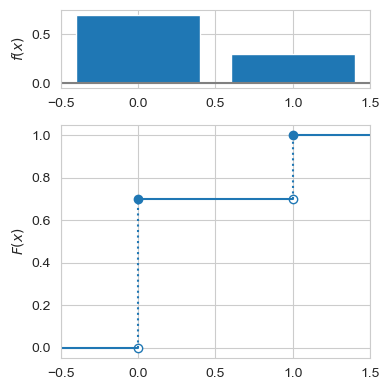

In [27]:
pmf_x = [0,1]
pmf = [dist.pmf(xx) for xx in pmf_x]
plot_pmfcdf(pmf_x, pmf)
plt.show()

# Geometric Distribution

In [28]:
p = 0.3
dist = stats.geom(p=p)

In [30]:
# All the functions are the same across distributions!
k = 2
x = 2
q = 0.9
print(f'PMF at k={k} is {dist.pmf(k=k)}.')
print(f'CDF at x={x} is {dist.cdf(x=x)}.')
print(f'PPF at q={q} is {dist.ppf(q=q)}.')
print(f'SF at x={x} is {dist.sf(x=x)}.')
print(f'ISF at q={q} is {dist.isf(q=q)}.')
print(f'Expectation is {dist.expect()}.')
print(f'Variance is {dist.var()}.')
print(f'Median is {dist.median()}.')
print(f'A random sample of 10 values is {dist.rvs(size=10)}.')

PMF at k=2 is 0.21.
CDF at x=2 is 0.51.
PPF at q=0.9 is 7.0.
SF at x=2 is 0.49.
ISF at q=0.9 is 1.0.
Expectation is 3.3333333333333317.
Variance is 7.777777777777779.
Median is 2.0.
A random sample of 10 values is [5 4 3 1 2 6 2 2 2 5].


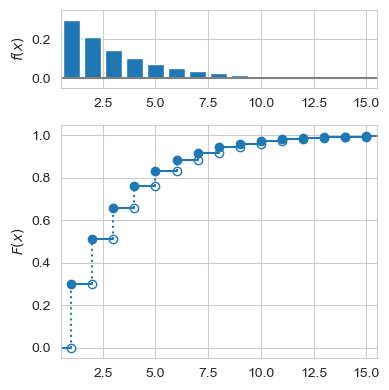

In [31]:
pmf_x = list(range(1,16))
pmf = [dist.pmf(xx) for xx in pmf_x]
plot_pmfcdf(pmf_x,pmf)
plt.show()


# Binomial Distribution

In [32]:
n= 10
p = 0.3
dist = stats.binom(n=n, p=p)

In [33]:
# All the functions are the same across distributions!
k = 4
x = 4
q = 0.9
print(f'PMF at k={k} is {dist.pmf(k=k)}.')
print(f'CDF at x={x} is {dist.cdf(x=x)}.')
print(f'PPF at q={q} is {dist.ppf(q=q)}.')
print(f'SF at x={x} is {dist.sf(x=x)}.')
print(f'ISF at q={q} is {dist.isf(q=q)}.')
print(f'Expectation is {dist.expect()}.')
print(f'Variance is {dist.var()}.')
print(f'Median is {dist.median()}.')
print(f'A random sample of 10 values is {dist.rvs(size=10)}.')

PMF at k=4 is 0.2001209489999999.
CDF at x=4 is 0.8497316674000001.
PPF at q=0.9 is 5.0.
SF at x=4 is 0.15026833259999992.
ISF at q=0.9 is 1.0.
Expectation is 2.999999999999998.
Variance is 2.0999999999999996.
Median is 3.0.
A random sample of 10 values is [5 3 2 2 3 2 4 2 2 5].


In [34]:
dist.support()

(0, 10)

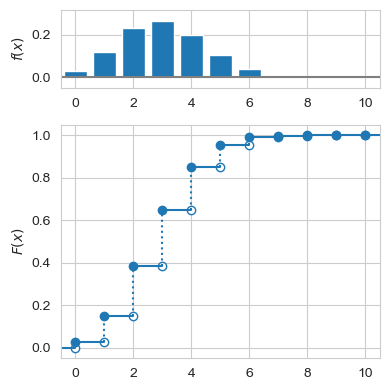

In [36]:
pmf_x = list(range(dist.support()[0], dist.support()[1]+1))
pmf = [dist.pmf(xx) for xx in pmf_x]
plot_pmfcdf(pmf_x,pmf)
plt.show()


# Poisson Distribution

In [37]:
lamb = 10 
dist = stats.poisson(mu=lamb)


In [38]:
# All the functions are the same across distributions!
k = 12
x = 12
q = 0.9
print(f'PMF at k={k} is {dist.pmf(k=k)}.')
print(f'CDF at x={x} is {dist.cdf(x=x)}.')
print(f'PPF at q={q} is {dist.ppf(q=q)}.')
print(f'SF at x={x} is {dist.sf(x=x)}.')
print(f'ISF at q={q} is {dist.isf(q=q)}.')
print(f'Expectation is {dist.expect()}.')
print(f'Variance is {dist.var()}.')
print(f'Median is {dist.median()}.')
print(f'A random sample of 10 values is {dist.rvs(size=10)}.')

PMF at k=12 is 0.09478033009176803.
CDF at x=12 is 0.7915564763948745.
PPF at q=0.9 is 14.0.
SF at x=12 is 0.20844352360512552.
ISF at q=0.9 is 6.0.
Expectation is 10.000000000000023.
Variance is 10.0.
Median is 10.0.
A random sample of 10 values is [ 9 15 17 14 11 14 12  8 14  9].


In [39]:
dist.support()

(0, inf)

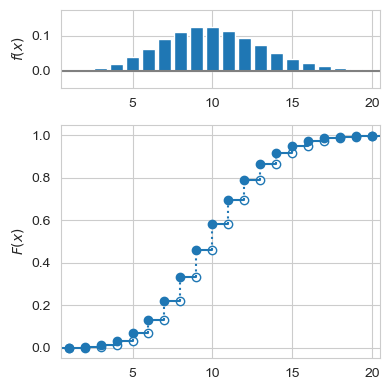

In [40]:
pmf_x = list(range(1,21))
pmf = [dist.pmf(xx) for xx in pmf_x]
plot_pmfcdf(pmf_x,pmf)
plt.show()
